In [1]:
!pip install sqlalchemy

In [2]:
!pip install --upgrade sqlalchemy

   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
    --------------------------------------- 0.0/2.1 MB 653.6 kB/s eta 0:00:04
   ---------- ----------------------------- 0.6/2.1 MB 6.0 MB/s eta 0:00:01
   ---------------------------- ----------- 1.5/2.1 MB 10.4 MB/s eta 0:00:01
   ---------------------------------------- 2.1/2.1 MB 12.1 MB/s eta 0:00:00
  Attempting uninstall: sqlalchemy
    Found existing installation: SQLAlchemy 2.0.30
    Uninstalling SQLAlchemy-2.0.30:
      Successfully uninstalled SQLAlchemy-2.0.30


In [1]:
pip install pymysql

   ---------------------------------------- 0.0/45.0 kB ? eta -:--:--
   --------- ------------------------------ 10.2/45.0 kB ? eta -:--:--
   ------------------ --------------------- 20.5/45.0 kB 330.3 kB/s eta 0:00:01
   ---------------------------------------- 45.0/45.0 kB 445.3 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pymysql

miconexion = pymysql.connect(
    host='localhost',
    user='root',
    password='1234',
    db='deportesdb')

cur = miconexion.cursor()
cur.execute("SELECT * FROM atletas")
atletas = cur.fetchall()
for atletas in atletas:
    print(atletas)
    

(1532872, 'Male', 'ALEKSANYAN Artur', 'Armenia', "['Wrestling']")
(1532873, 'Male', 'AMOYAN Malkhas', 'Armenia', "['Wrestling']")
(1532874, 'Male', 'GALSTYAN Slavik', 'Armenia', "['Wrestling']")
(1532944, 'Male', 'HARUTYUNYAN Arsen', 'Armenia', "['Wrestling']")
(1532945, 'Male', 'TEVANYAN Vazgen', 'Armenia', "['Wrestling']")
(1532951, 'Female', 'ARENAS Lorena', 'Colombia', "['Athletics']")
(1533112, 'Male', 'McKENZIE Ashley', 'Jamaica', "['Judo']")
(1533136, 'Female', 'BASS BITTAYE Gina Mariam', 'Gambia', "['Athletics']")
(1533176, 'Male', 'CAMARA Ebrahima', 'Gambia', "['Athletics']")
(1533188, 'Female', 'RUEDA SANTOS Lizeth', 'Mexico', "['Triathlon']")
(1533189, 'Female', 'TAPIA VIDAL Rosa Maria', 'Mexico', "['Triathlon']")
(1533190, 'Male', 'GRAJALES Crisanto', 'Mexico', "['Triathlon']")
(1533208, 'Male', 'MAAROUFOU Hachim', 'Comoros', "['Athletics']")
(1533209, 'Female', 'SAADI Maesha', 'Comoros', "['Swimming']")
(1533230, 'Female', 'DIOSDADO Nuria', 'Mexico', "['Artistic Swimming']

C:\Users\Casa\AppData\Local\Temp\ipykernel_3768\3611710090.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conteo_genero.index, y=conteo_genero.values, palette='viridis')


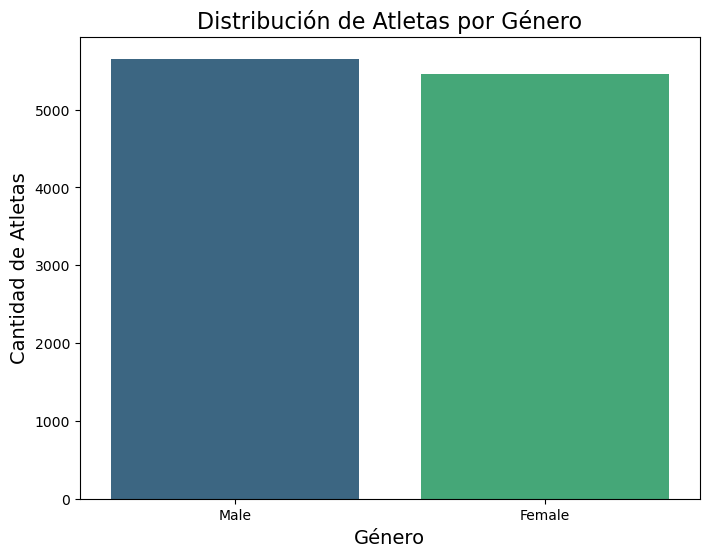

In [1]:
import pymysql
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Conexión a la base de datos
miconexion = pymysql.connect(
    host='localhost',
    user='root',
    password='1234',
    db='deportesdb'
)

# Crear un cursor
cur = miconexion.cursor()

# Ejecutar la consulta para obtener todos los atletas
cur.execute("SELECT name, gender FROM atletas")
atletas = cur.fetchall()

# Cerrar la conexión
cur.close()
miconexion.close()

# Convertir los datos en un DataFrame de pandas
df = pd.DataFrame(atletas, columns=['nombre', 'genero'])

# Contar el número de atletas por género
conteo_genero = df['genero'].value_counts()

# Crear un gráfico de barras
plt.figure(figsize=(8, 6))
sns.barplot(x=conteo_genero.index, y=conteo_genero.values, palette='viridis')
plt.title('Distribución de Atletas por Género', fontsize=16)
plt.xlabel('Género', fontsize=14)
plt.ylabel('Cantidad de Atletas', fontsize=14)
plt.show()


C:\Users\Casa\AppData\Local\Temp\ipykernel_3768\11873911.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=paises_mas_mujeres.index, y=paises_mas_mujeres['diferencia'], palette='coolwarm')


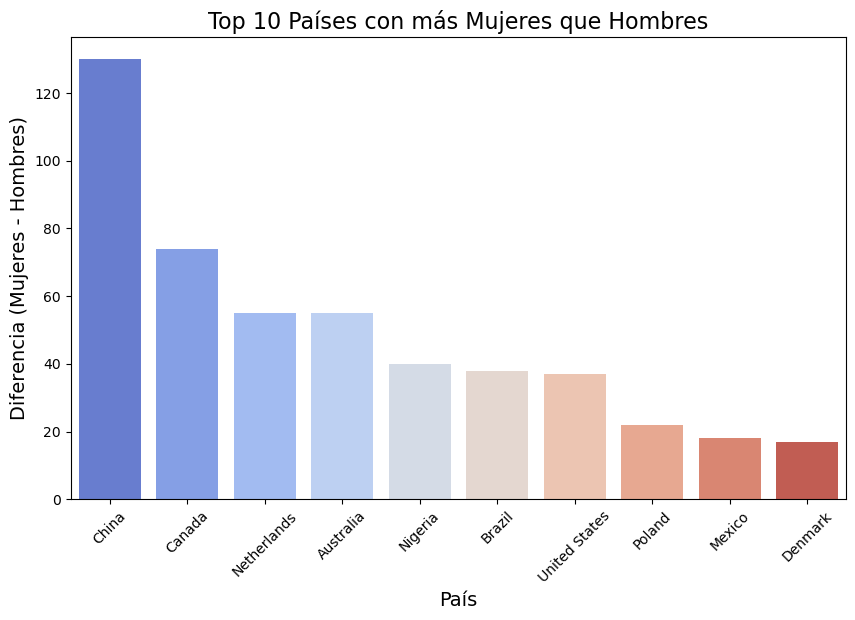

In [3]:
import pymysql
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Conexión a la base de datos
miconexion = pymysql.connect(
    host='localhost',
    user='root',
    password='1234',
    db='deportesdb'
)

# Crear un cursor
cur = miconexion.cursor()

# Ejecutar la consulta para obtener los atletas con nombre, género y país
cur.execute("SELECT country, gender FROM atletas")
atletas = cur.fetchall()

# Cerrar la conexión
cur.close()
miconexion.close()

# Convertir los datos en un DataFrame de pandas
df = pd.DataFrame(atletas, columns=['pais', 'genero'])

# Contar el número de hombres y mujeres por país
conteo_por_pais = df.groupby(['pais', 'genero']).size().unstack(fill_value=0)

# Calcular la diferencia entre mujeres y hombres (asumiendo que 'F' es mujer y 'M' es hombre)
conteo_por_pais['diferencia'] = conteo_por_pais['Female'] - conteo_por_pais['Male']

# Obtener los 10 países con más mujeres que hombres
paises_mas_mujeres = conteo_por_pais.sort_values(by='diferencia', ascending=False).head(10)

# Crear un gráfico de barras para los 10 países con más mujeres que hombres
plt.figure(figsize=(10, 6))
sns.barplot(x=paises_mas_mujeres.index, y=paises_mas_mujeres['diferencia'], palette='coolwarm')
plt.title('Top 10 Países con más Mujeres que Hombres', fontsize=16)
plt.xlabel('País', fontsize=14)
plt.ylabel('Diferencia (Mujeres - Hombres)', fontsize=14)
plt.xticks(rotation=45)
plt.show()
